# DATA VISUALIZATION

**LOAD DATA**

The attributes have been selected and extracted from the data file obtained from the study

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#--- Load the dataset ---#
df = pd.read_excel("Datasæt_Gallstone.xlsx")

# Preview
print(df.head())

   Gallstone Status  Age  Gender  Height  Weight  Vitamin D  CRP  TBFR (%)
0                 0   50       0     185    92.8       33.0  0.0      19.2
1                 0   47       0     176    94.5       25.0  0.0      32.8
2                 0   61       0     171    91.1       30.2  0.0      27.3
3                 0   41       0     168    67.7       35.4  0.0      15.8
4                 0   42       0     178    89.6       40.6  0.0      20.0


# DISTRIBUTION OF ATTRIBUTES

**HISTOGRAMS OF CONTINUOUS ATTRIBUTES**

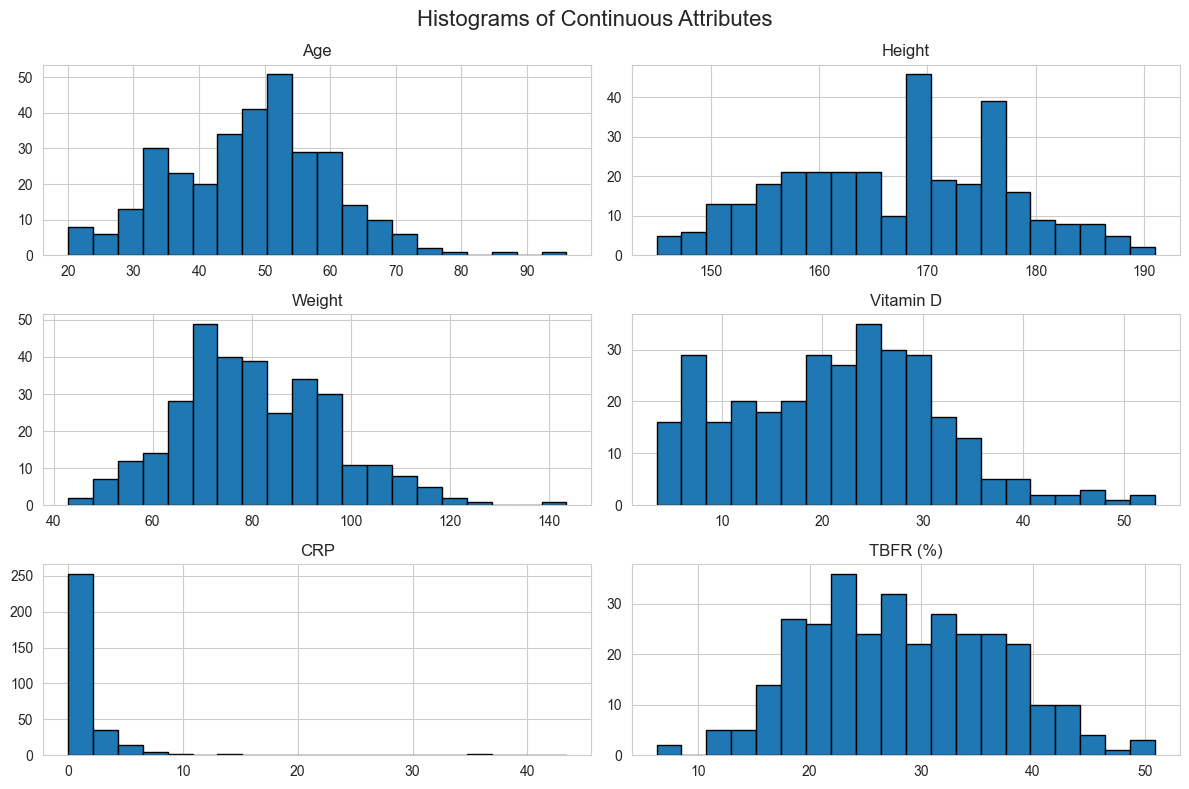

In [19]:
# Histograms for continuous attributes
continuous_attributes = ["Age", "Height", "Weight", "Vitamin D", 
                       "CRP", "TBFR (%)"]

df[continuous_attributes].hist(bins=20, figsize=(12, 8), edgecolor="black")
plt.suptitle("Histograms of Continuous Attributes", fontsize=16)
plt.tight_layout()
plt.show()


**GROUPED BOXPLOT**

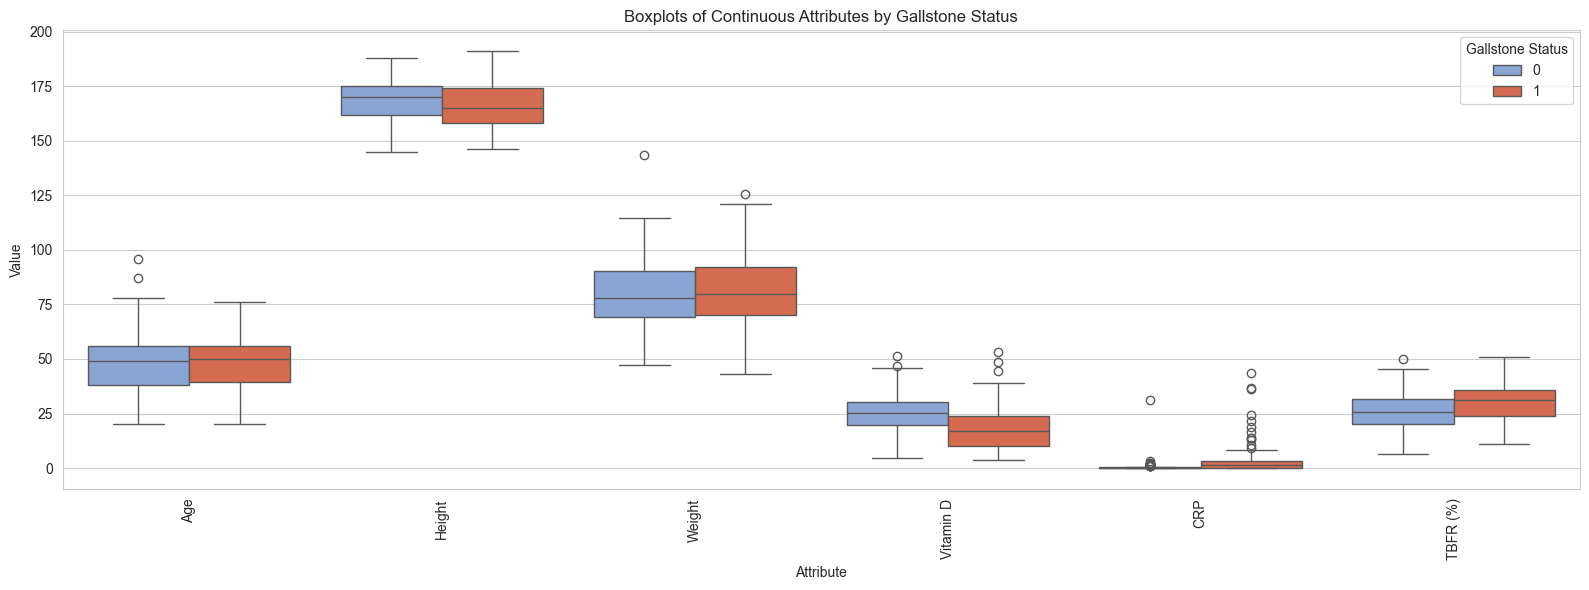

In [ ]:
# Take the continous attributes' data
continuous_df = df[continuous_attributes]

# Make a copy of the continuous variables
long_df = continuous_df.copy()

# Add Gallstone status as a column
long_df["Gallstone Status"] = df["Gallstone Status"]

long_df = long_df.melt(id_vars="Gallstone Status", 
                       var_name="Attribute", 
                       value_name="Value")

# Create grouped boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Attribute", y="Value", hue="Gallstone Status", data=long_df, palette=["#7CA2E0", "#EB5E3A"])

plt.title("Boxplots of Continuous Attributes by Gallstone Status")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.tight_layout()
plt.show()



/var/folders/db/f767b2rs36q3h7wk_t_8887r0000gn/T/ipykernel_4372/502816851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gallstone Status", y=col, data=df, palette=["#7CA2E0", "#EB5E3A"])


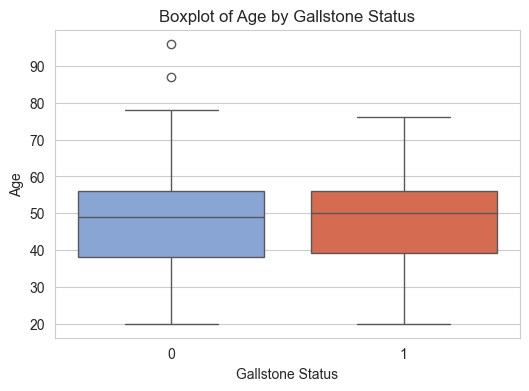

/var/folders/db/f767b2rs36q3h7wk_t_8887r0000gn/T/ipykernel_4372/502816851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gallstone Status", y=col, data=df, palette=["#7CA2E0", "#EB5E3A"])


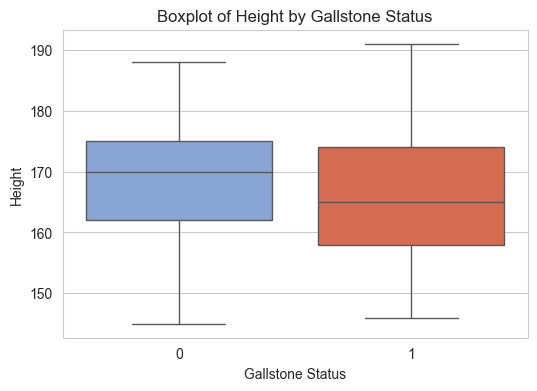

/var/folders/db/f767b2rs36q3h7wk_t_8887r0000gn/T/ipykernel_4372/502816851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gallstone Status", y=col, data=df, palette=["#7CA2E0", "#EB5E3A"])


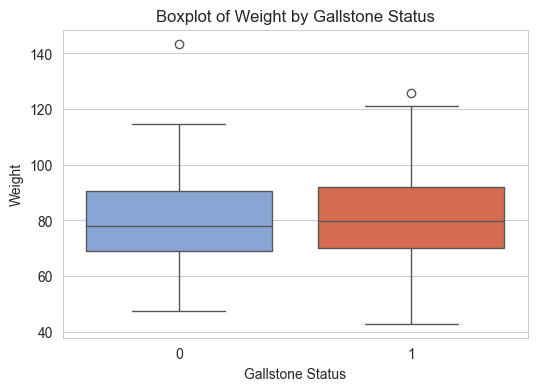

/var/folders/db/f767b2rs36q3h7wk_t_8887r0000gn/T/ipykernel_4372/502816851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gallstone Status", y=col, data=df, palette=["#7CA2E0", "#EB5E3A"])


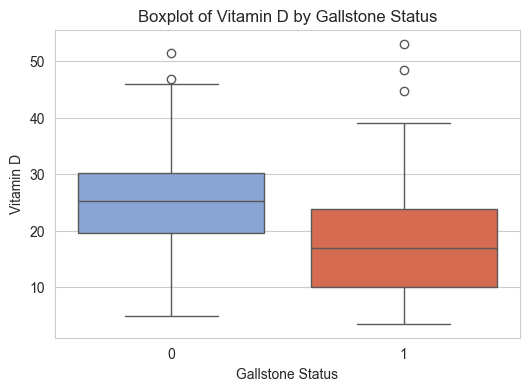

/var/folders/db/f767b2rs36q3h7wk_t_8887r0000gn/T/ipykernel_4372/502816851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gallstone Status", y=col, data=df, palette=["#7CA2E0", "#EB5E3A"])


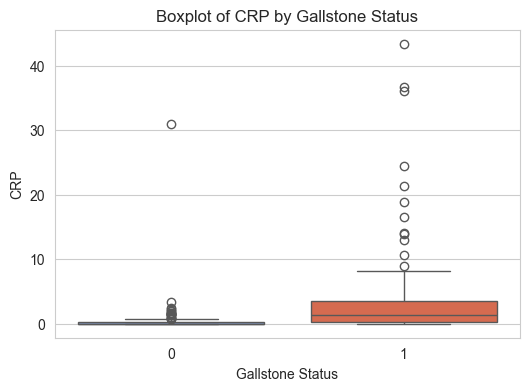

/var/folders/db/f767b2rs36q3h7wk_t_8887r0000gn/T/ipykernel_4372/502816851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gallstone Status", y=col, data=df, palette=["#7CA2E0", "#EB5E3A"])


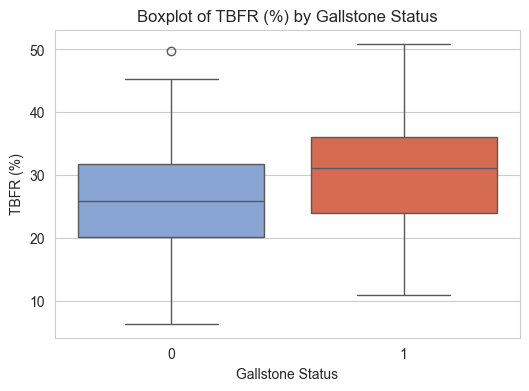

In [22]:
# Boxplots by Gallstone Status
for col in continuous_attributes:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Gallstone Status", y=col, data=df, palette=["#7CA2E0", "#EB5E3A"])
    plt.title(f"Boxplot of {col} by Gallstone Status")
    plt.show()

# RELATIONSHIPS BETWEEN ATTRIBUTES

**CORRELATION HEATMAP**

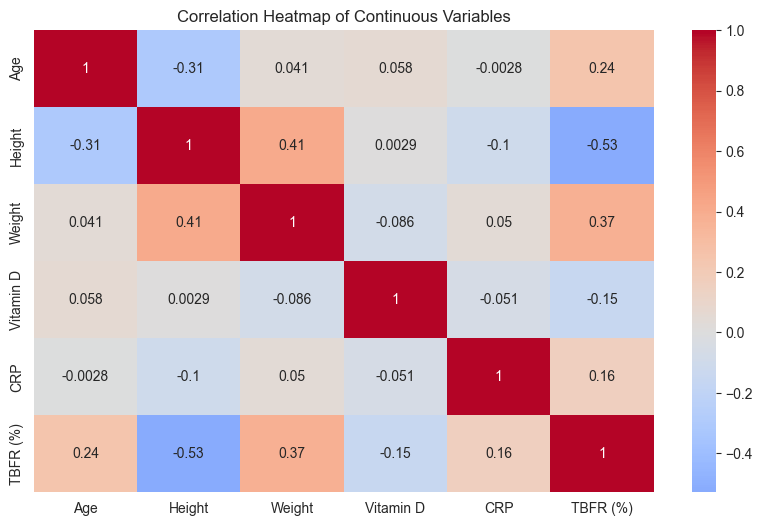

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous_attributes].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

**MATRIX SCATTER PLOT**

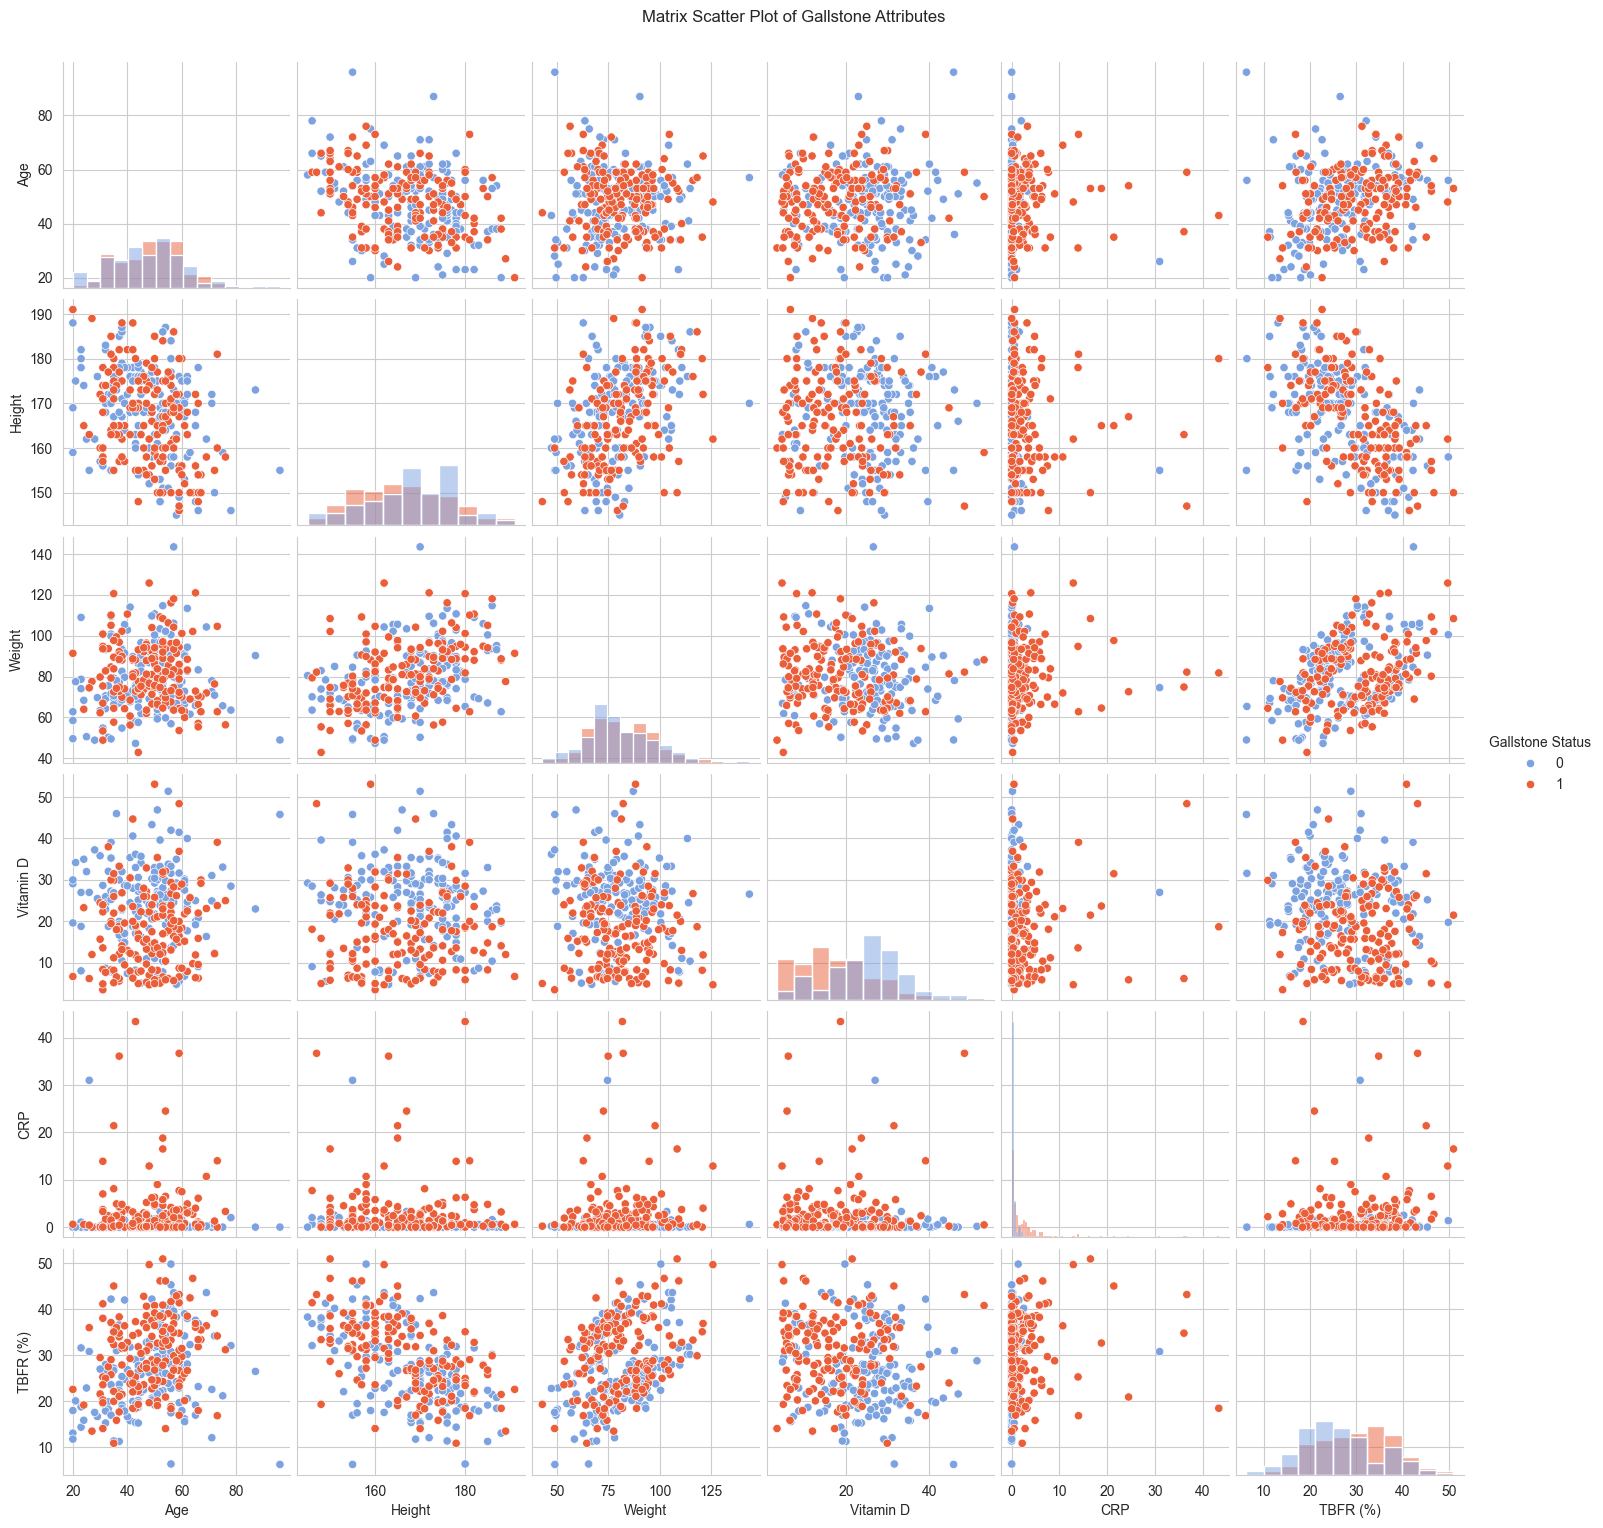

In [24]:
sns.pairplot(df, vars=continuous_df.columns, 
             hue="Gallstone Status", 
             palette=["#7CA2E0", "#EB5E3A"], diag_kind="hist")
plt.suptitle("Matrix Scatter Plot of Gallstone Attributes", y=1.02)
plt.show()


# STANDARDIZATION

/var/folders/db/f767b2rs36q3h7wk_t_8887r0000gn/T/ipykernel_4372/2002586131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df["CRP"] = np.log1p(continuous_df["CRP"])


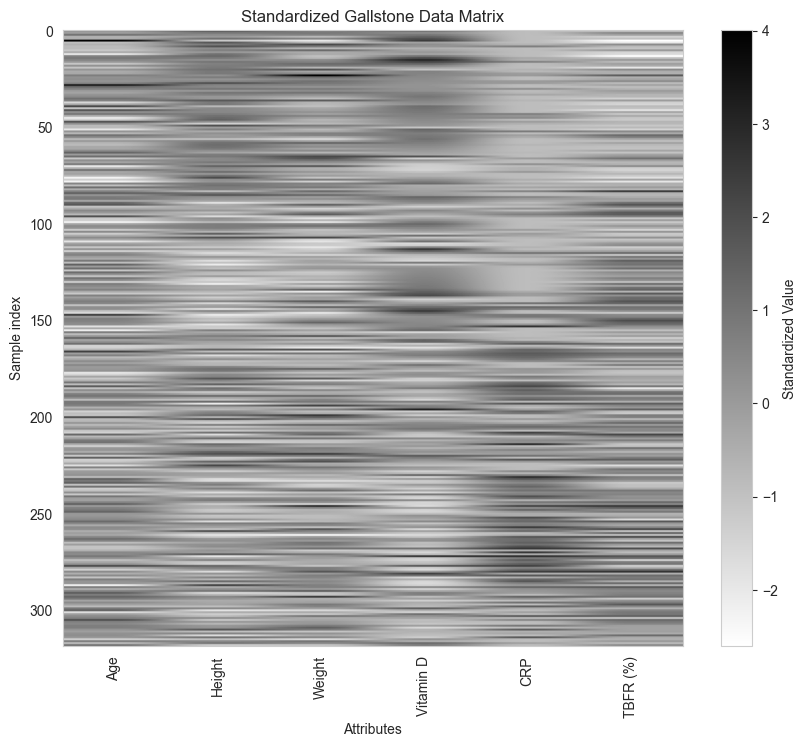

In [26]:
# Select only continuous attributes

# Log-transform CRP (safe version: log(1+x))
continuous_df["CRP"] = np.log1p(continuous_df["CRP"])

# Standardize (z-score)
X_standardized = (continuous_df - continuous_df.mean(axis=0)) / continuous_df.std(axis=0)

# Plot standardized matrix as image
fig = plt.figure(figsize=(10, 8))
plt.imshow(X_standardized, aspect='auto', cmap='gray_r')
plt.colorbar(label="Standardized Value")
plt.title("Standardized Gallstone Data Matrix")
plt.xticks(ticks=np.arange(X_standardized.shape[1]), labels=continuous_df.columns, rotation=90)
plt.xlabel("Attributes")
plt.ylabel("Sample index")
plt.grid(False)
plt.show()


**STANDARDIZED BOXPLOT**

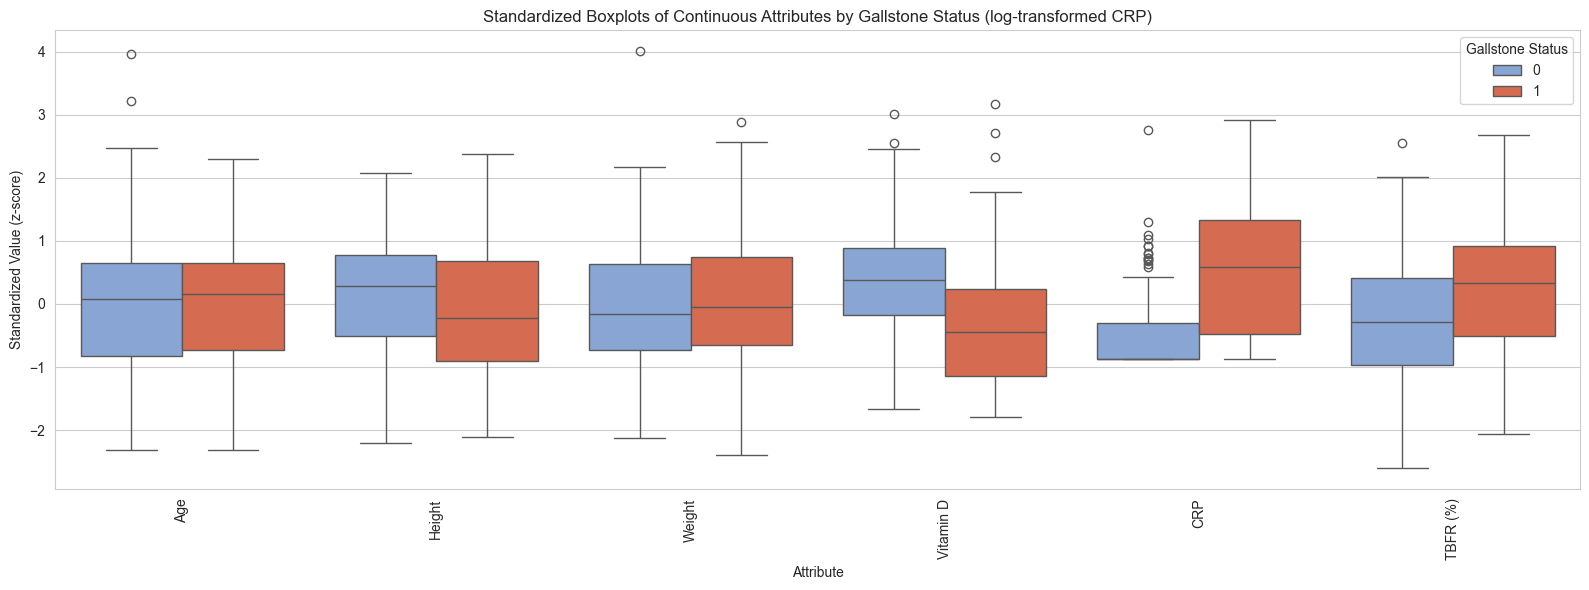

In [28]:
# Melt dataframe to long format for Seaborn
long_df = X_standardized.copy()
long_df["Gallstone Status"] = df["Gallstone Status"]

long_df = long_df.melt(id_vars="Gallstone Status", 
                       var_name="Attribute", 
                       value_name="Standardized Value")

# Create grouped boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Attribute", y="Standardized Value", hue="Gallstone Status", 
            data=long_df, palette=["#7CA2E0", "#EB5E3A"])

plt.title("Standardized Boxplots of Continuous Attributes by Gallstone Status (log-transformed CRP)")
plt.xticks(rotation=90)
plt.ylabel("Standardized Value (z-score)")
plt.tight_layout()
plt.show()

# PCA

    PC  Explained Variance  Cumulative Explained Variance
0  PC1            0.312631                       0.312631
1  PC2            0.241672                       0.554303
2  PC3            0.175433                       0.729736
3  PC4            0.127361                       0.857098
4  PC5            0.124072                       0.981169
5  PC6            0.018831                       1.000000


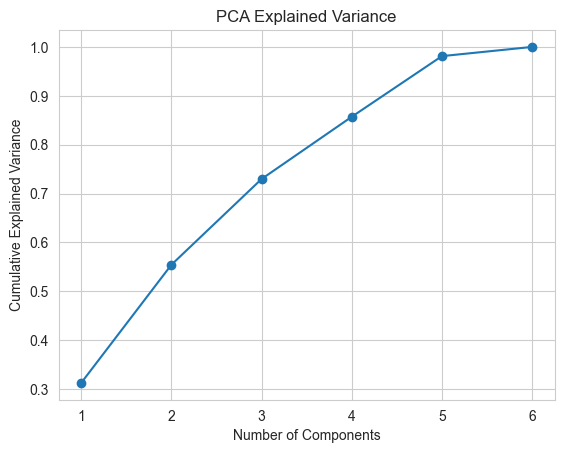

In [27]:
# PCA
from sklearn.decomposition import PCA


pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained variance
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

# Show as DataFrame
explained_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_var))],
    "Explained Variance": explained_var,
    "Cumulative Explained Variance": cum_explained_var
})

print(explained_df)

# --- Plot ---
plt.plot(range(1, len(explained_var)+1), cum_explained_var, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()